# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** Rizky Achmad Naufal
- **Email:** achmadnaufal.rizky@gmail.com
- **ID Dicoding:** naufalky

## Menentukan Pertanyaan Bisnis

- Apakah tren penyewaan sepeda meningkat atau menurun dari tahun 2011 ke 2012?
- Bagaimana cuaca (seperti suhu, kelembapan, dan kecepatan angin) mempengaruhi jumlah sepeda yang disewa?
- Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim antara pengguna terdaftar dan pengguna biasa?



## Import Semua Packages/Library yang Digunakan

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [141]:
day_df = pd.read_csv("https://raw.githubusercontent.com/naufalkiky/Dicoding/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [142]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/naufalkiky/Dicoding/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Bike Sharing dataset berisi data yang terkait dengan sistem berbagi sepeda. Kumpulan data tersebut mencatat penggunaan layanan penyewaan sepeda. data set ini terdiri dari 2 berkas file csv:


*   day.csv : Data agregat penggunaan sepeda harian.
*   hour.csv : Data penggunaan sepeda per jam.




### Assessing Data

Melihat info data

In [143]:
print('\n', day_df.info())
print('\n', hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

apakah ada nilai null pada setiap dataFrame?

In [144]:
print('\nInfo nilai null pada data day\n', day_df.isna().sum())
print('\nInfo nilai null pada data hour\n', hour_df.isna().sum())


Info nilai null pada data day
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info nilai null pada data hour
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek apakah ada duplikasi data?

In [145]:
print('\ndata day: ', day_df.duplicated().sum())
print('\ndata hour : ', hour_df.duplicated().sum())


data day:  0

data hour :  0


Statistik Deskriptif Dataset Bike Sharing

**Mengecek Outlier**

In [146]:
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]
print("\nOutliers berdasarkan jumlah penyewaan (cnt):")
print(outliers[['cnt', 'temp', 'hum', 'windspeed']])


Outliers berdasarkan jumlah penyewaan (cnt):
Empty DataFrame
Columns: [cnt, temp, hum, windspeed]
Index: []


In [147]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]
print("\nOutliers berdasarkan jumlah penyewaan (cnt):")
print(outliers[['cnt', 'temp', 'hum', 'windspeed']])


Outliers berdasarkan jumlah penyewaan (cnt):
       cnt  temp   hum  windspeed
5536   651  0.72  0.30     0.0896
10358  644  0.62  0.38     0.4179
10359  712  0.60  0.43     0.1940
10382  676  0.70  0.37     0.1045
10383  734  0.70  0.34     0.2985
...    ...   ...   ...        ...
16885  724  0.34  0.61     0.2985
16909  688  0.26  0.65     0.1642
16933  679  0.24  0.60     0.1940
17053  662  0.38  0.94     0.0000
17077  678  0.24  0.87     0.1045

[505 rows x 4 columns]


Data day

In [148]:
day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


data hour

In [149]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight**



1.   Dari hasil penilaian data terdapat berberapa kolom yang hanya di reperesentasikan dengan angka, sehingga sulit untuk dibaca. berikut adalah nama kolom-kolomnya :

*   season
*   yr
*   holiday
*   working day
2.  Tipe data pada kolom "dteday" sala karena bernilai object bukan datetime.
3. Terdapat outlier pada berkas hour.csv













### Cleaning Data

Mengubah Tipe data kolom "dteday"

In [150]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')
print(day_df['dteday'].dtype)

datetime64[ns]


In [151]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [152]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')
print(hour_df['dteday'].dtype)

datetime64[ns]


In [153]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [154]:
file_path = 'https://raw.githubusercontent.com/naufalkiky/Dicoding/refs/heads/main/data/hour.csv'
data = pd.read_csv(file_path)

Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['cnt'] < lower_bound) | (data['cnt'] > upper_bound)]

# Mengganti outlier dengan median
median_value = data['cnt'].median()
data.loc[data['cnt'] < lower_bound, 'cnt'] = median_value
data.loc[data['cnt'] > upper_bound, 'cnt'] = median_value

# Mengganti outlier dengan batas
data['cnt'] = np.where(data['cnt'] < lower_bound, lower_bound, data['cnt'])
data['cnt'] = np.where(data['cnt'] > upper_bound, upper_bound, data['cnt'])

print("Statistik Deskriptif Setelah Imputasi:")
print(data['cnt'].describe())

Statistik Deskriptif Setelah Imputasi:
count    17379.000000
mean       171.817769
std        152.838957
min          1.000000
25%         40.000000
50%        142.000000
75%        260.000000
max        642.000000
Name: cnt, dtype: float64


**Mengubah nilai kolom "season"**

In [155]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].replace(season_mapping)
hour_df['season'] = hour_df['season'].replace(season_mapping)

# Menyimpan kembali data yang sudah diubah
day_df.to_csv('day_df.csv', index=False)
hour_df.to_csv('hour_df.csv', index=False)

In [156]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [157]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengubah Kolom "yr"**

In [158]:
year_mapping = {0: 2011, 1: 2012}
day_df['yr'] = day_df['yr'].replace(year_mapping)
hour_df['yr'] = hour_df['yr'].replace(year_mapping)

In [159]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [160]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengubah Kolom "Holiday"**

In [161]:
holiday_mapping = {0: 'Not Holiday', 1: 'Holiday'}
day_df['holiday'] = day_df['holiday'].replace(holiday_mapping)
hour_df['holiday'] = hour_df['holiday'].replace(holiday_mapping)

In [162]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,Not Holiday,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,Not Holiday,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,Not Holiday,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,Not Holiday,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,Not Holiday,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [163]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Not Holiday,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Not Holiday,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Not Holiday,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Not Holiday,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Not Holiday,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengubah Kolom "Workingday"**

In [164]:

day_df['workingday'] = day_df['weekday'].apply(lambda x: 'weekend or holiday' if x in [0, 6] else 'workingday')
hour_df['workingday'] = hour_df['weekday'].apply(lambda x: 'weekend or holiday' if x in [0, 6] else 'workingday')


In [165]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,Not Holiday,6,weekend or holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,Not Holiday,0,weekend or holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,Not Holiday,1,workingday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,Not Holiday,2,workingday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,Not Holiday,3,workingday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- tipe data pada kolom "dteday" diubah, dari object menjadi datetime
- memperbaiki outlier pada berkas hour.csv
- mengubah nilai pada kolom (season, yr, holiday, dan working day)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [166]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
534,535,2012-06-18,Summer,2012,6,Not Holiday,1,workingday,2,0.568333,0.544842,0.777917,0.174746,653,4446,5099
337,338,2011-12-04,Winter,2011,12,Not Holiday,0,weekend or holiday,1,0.330833,0.349100,0.775833,0.083958,634,2851,3485
258,259,2011-09-16,Fall,2011,9,Not Holiday,5,workingday,2,0.469167,0.461475,0.590417,0.164183,742,4018,4760
514,515,2012-05-29,Summer,2012,5,Not Holiday,2,workingday,1,0.722500,0.672992,0.684583,0.295400,880,4863,5743
122,123,2011-05-03,Summer,2011,5,Not Holiday,2,workingday,2,0.616667,0.582079,0.697083,0.342667,603,3848,4451


In [167]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,Not Holiday,NaN,workingday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,710,NaN,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,NaN,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,NaN,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,NaN,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,NaN,3.000000,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,NaN,5.000000,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,NaN,6.000000,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [168]:
day_df.instant.is_unique

True

In [169]:
day_df.instant.duplicated()

,instant
0,False
1,False
2,False
3,False
4,False
...,...
726,False
727,False
728,False
729,False


#### Memeriksa Distribusi Kolom Kategorikal pada berkas day.csv

In [170]:
print("Distribusi Kolom Kategorikal di day.csv:")
print(day_df['season'].value_counts())
print(day_df['yr'].value_counts())
print(day_df['holiday'].value_counts())
print(day_df['workingday'].value_counts())
print("\n")

Distribusi Kolom Kategorikal di day.csv:
season
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64
yr
2012    366
2011    365
Name: count, dtype: int64
holiday
Not Holiday    710
Holiday         21
Name: count, dtype: int64
workingday
workingday            521
weekend or holiday    210
Name: count, dtype: int64




In [171]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
Fall,188
Summer,184
Spring,181
Winter,178


In [172]:
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

,instant
workingday,
workingday,521
weekend or holiday,210


#### Melihat rata-rata penyewaan sepeda berdasarakn musim di berkas day.csv

In [173]:
print("Rata-rata Penyewaan Sepeda berdasarkan Musim di day.csv:")
print(day_df.groupby('season')['cnt'].mean())
print("\n")

Rata-rata Penyewaan Sepeda berdasarkan Musim di day.csv:
season
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64




### Explore hour_df

In [174]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5035,5036,2011-08-02,Fall,2011,8,17,Not Holiday,2,workingday,2,0.90,0.7879,0.27,0.1343,63,493,556
15432,15433,2012-10-10,Winter,2012,10,5,Not Holiday,3,workingday,2,0.46,0.4545,0.88,0.0896,2,38,40
10691,10692,2012-03-26,Summer,2012,3,14,Not Holiday,1,workingday,1,0.48,0.4697,0.33,0.4478,58,159,217
2226,2227,2011-04-07,Summer,2011,4,15,Not Holiday,4,workingday,1,0.60,0.6212,0.38,0.1045,27,133,160
7203,7204,2011-11-01,Winter,2011,11,18,Not Holiday,2,workingday,1,0.42,0.4242,0.58,0.1045,39,421,460


In [175]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,Not Holiday,NaN,workingday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,16879,NaN,12365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,NaN,3.003683,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,NaN,1.000000,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,NaN,3.000000,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,NaN,5.000000,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,NaN,6.000000,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [176]:
hour_df.hr.is_unique

False

In [177]:
hour_df.hr.duplicated()

,hr
0,False
1,False
2,False
3,False
4,False
...,...
17374,True
17375,True
17376,True
17377,True


In [178]:
hour_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
Fall,4496
Summer,4409
Spring,4242
Winter,4232


In [179]:
hour_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

,instant
holiday,
Not Holiday,16879
Holiday,500


####

#### Memeriksa Distribusi Kolom Kategorikal pada berkas hour.csv

In [180]:
print("Distribusi Kolom Kategorikal di hour.csv:")
print(hour_df['season'].value_counts())
print(hour_df['yr'].value_counts())
print(hour_df['holiday'].value_counts())
print(hour_df['workingday'].value_counts())
print("\n")


Distribusi Kolom Kategorikal di hour.csv:
season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64
yr
2012    8734
2011    8645
Name: count, dtype: int64
holiday
Not Holiday    16879
Holiday          500
Name: count, dtype: int64
workingday
workingday            12365
weekend or holiday     5014
Name: count, dtype: int64




#### Melihat rata-rata penyewaan sepeda berdasarkan workingday di berkas hour.csv

In [181]:
print("Rata-rata Penyewaan Sepeda berdasarkan Workingday di hour.csv:")
print(hour_df.groupby('workingday')['cnt'].mean())
print("\n")

Rata-rata Penyewaan Sepeda berdasarkan Workingday di hour.csv:
workingday
weekend or holiday    183.852014
workingday            191.738374
Name: cnt, dtype: float64




## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah tren penggunaan sepeda meningkat atau menurun dari tahun 2011 ke 2012?

In [188]:
# Menghitung jumlah penyewaan sepeda berdasarkan tanggal dan tahun
daily_rentals = day_df.groupby(['dteday', 'yr'])['cnt'].sum().reset_index()

print("\nData Harian Penyewaan:")
print(daily_rentals.head())


Data Harian Penyewaan:
      dteday    yr   cnt
0 2011-01-01  2011   985
1 2011-01-02  2011   801
2 2011-01-03  2011  1349
3 2011-01-04  2011  1562
4 2011-01-05  2011  1600


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


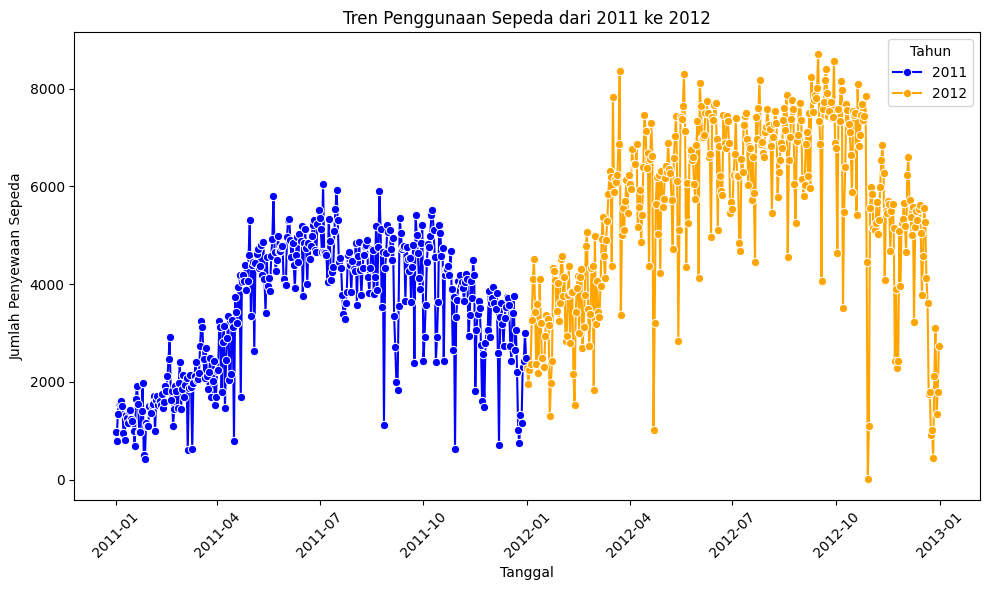

In [184]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_rentals, x='dteday', y='cnt', hue='yr', marker='o', palette=['blue', 'orange'])
plt.title('Tren Penggunaan Sepeda dari 2011 ke 2012')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()

Tren penggunaan sepeda tertinggi terjadi pada bulan 10 tahun 2012 dengan jumlah penyewaan sepeda lebih dari 8000

### Pertanyaan 2: Apakah jumlah penyewaan sepeda berbeda antara hari kerja dan hari libur?

<ipython-input-186-699d72a31287>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='holiday', y='cnt', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

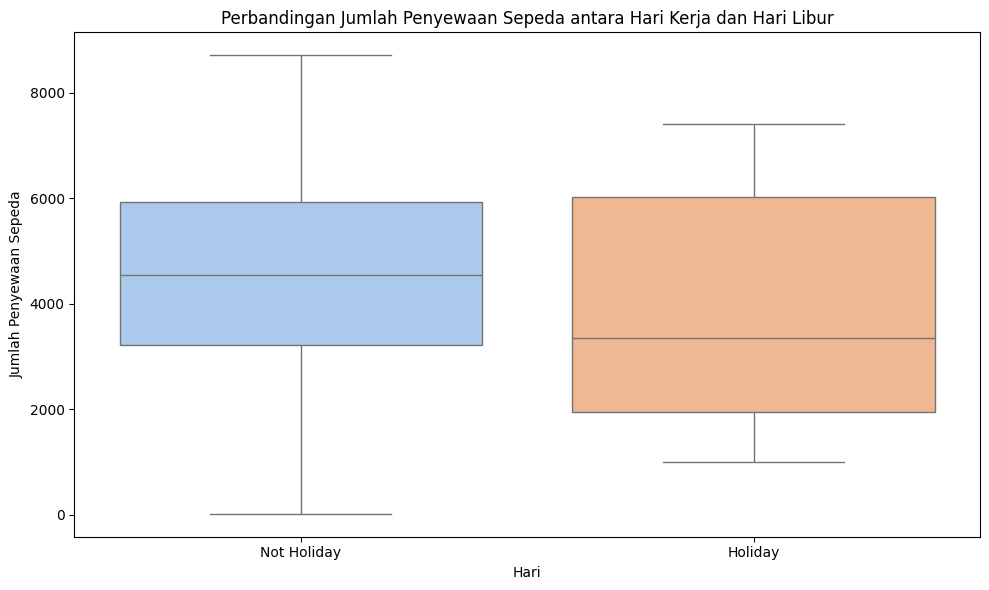

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='holiday', y='cnt', palette='pastel')
plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim antara pengguna terdaftar dan pengguna biasa?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


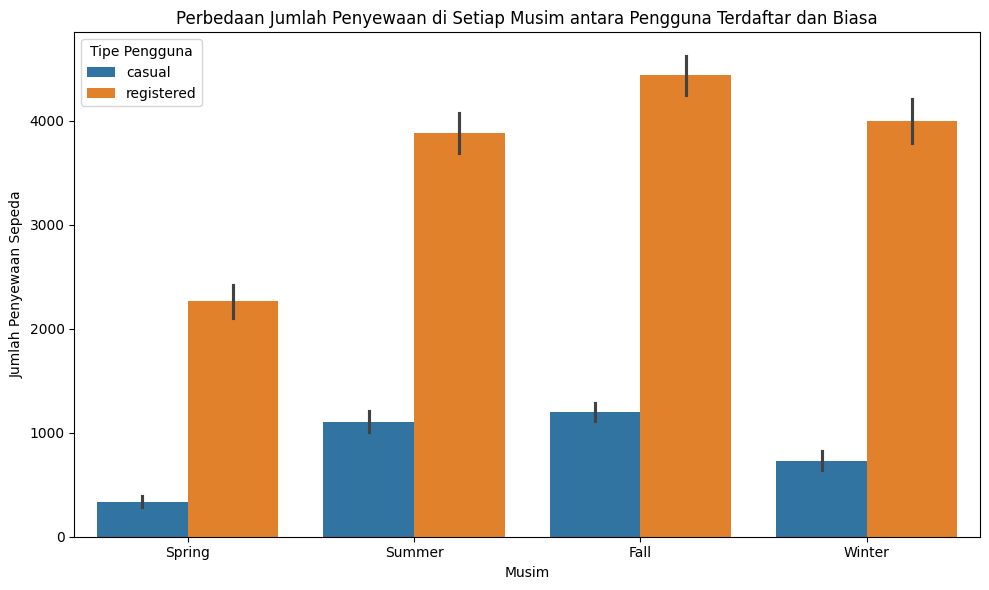

In [187]:
plt.figure(figsize=(10, 6))

sns.barplot(data=day_df.melt(id_vars=['season'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count'),
            x='season', y='count', hue='user_type')

plt.title('Perbedaan Jumlah Penyewaan di Setiap Musim antara Pengguna Terdaftar dan Biasa')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tipe Pengguna', loc='upper left')
plt.tight_layout()
plt.show()

pengguna terdaftar di setiap musim lebih banyak menyewa sepeda dari pada pengguna biasa

## Analisis Lanjutan (Opsional)

## Conclusion

#### Question
1. Apakah tren penggunaan sepeda meningkat atau menurun dari tahun 2011 ke 2012?
2. Apakah jumlah penyewaan sepeda berbeda antara hari kerja dan hari libur?
3. Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim antara pengguna terdaftar dan pengguna biasa?

#### Conclusion

1.   Tren penggunaan sepeda dari tahun 2011 ke 2012 terjadi fluktuatif(naik-turun). titik tertinggi penyewaan sepada terjadi pada bulan 10 tahun 2012. tren penggunaan sepeda dapat dipengaruhi oleh banyak faktor (seperti musim dan cuaca)
2.   Jumlah penyewaan sepeda pada hari libur secara umum lebih tinggi dibandingkan dengan hari kerja. Variasi jumlah penyewaan sepeda pada hari libur lebih besar dibandingkan dengan hari kerja. Ini mungkin disebabkan oleh lebih banyak orang yang memiliki waktu luang untuk bersepeda pada hari libur. Dapat juga disebabkan oleh faktor-faktor seperti cuaca atau acara khusus
3. Pengguna terdaftar merupakan kontributor utama bagi total jumlah penyewaan sepeda. Musim panas dan musim gugur adalah menjadi musim puncak untuk penyewaan sepeda. Ada pola konsisten dimana pengguna terdaftar lebih banyak menyewa sepeda dibandingkan pengguna biasa di setiap musim.





In [190]:
all_df = pd.merge(day_df, hour_df, on='instant', how='outer')
all_df.to_csv("all_data.csv", index=False)